In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('startup_funding.csv')

In [ ]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [ ]:
df.shape

(3044, 10)

# Project Goal
To analyze the Indian startup ecosystem to identify key patterns in funding activities, such as:

- Which industries receive the most funding?
- Which cities are most startup-friendly?
- Which investors are most active?
- How funding trends evolved over time?

#Data Cleaning

In [ ]:
#Standardizing column names:-
df.columns = df.columns.str.strip().str.replace(' ','_').str.lower().str.replace('__','_')

In [ ]:
df.rename(columns={'date_dd/mm/yyyy':'date', 'investmentntype':'investment_type'}, inplace=True)
df.head()

,sr_no,date,startup_name,industry_vertical,subvertical,city_location,investors_name,investment_type,amount_in_usd,remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [ ]:
df = df.drop(columns = ['sr_no'])

In [ ]:
df.head()

,date,startup_name,industry_vertical,subvertical,city_location,investors_name,investment_type,amount_in_usd,remarks
0,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [ ]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               3044 non-null   object
 1   startup_name       3044 non-null   object
 2   industry_vertical  2873 non-null   object
 3   subvertical        2108 non-null   object
 4   city_location      2864 non-null   object
 5   investors_name     3020 non-null   object
 6   investment_type    3040 non-null   object
 7   amount_in_usd      2084 non-null   object
 8   remarks            419 non-null    object
dtypes: object(9)
memory usage: 214.2+ KB


In [ ]:
#fixing the dtypes
df['amount_in_usd'] = df['amount_in_usd'].str.replace(',','').str.strip()
df['amount_in_usd'].head()

,amount_in_usd
0,200000000
1,8048394
2,18358860
3,3000000
4,1800000


In [ ]:
df['amount_in_usd'].unique()
df['amount_in_usd'] = pd.to_numeric(df['amount_in_usd'], errors='coerce')

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               1292 non-null   datetime64[ns]
 1   startup_name       3044 non-null   object        
 2   industry_vertical  2873 non-null   object        
 3   subvertical        2108 non-null   object        
 4   city_location      2864 non-null   object        
 5   investors_name     3020 non-null   object        
 6   investment_type    3040 non-null   object        
 7   amount_in_usd      2065 non-null   float64       
 8   remarks            419 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 214.2+ KB


#Handling missing values

In [ ]:
df.isnull().mean()*100

,0
date,57.555848
startup_name,0.000000
industry_vertical,5.617608
subvertical,30.749014
city_location,5.913272
investors_name,0.788436
investment_type,0.131406
amount_in_usd,32.161629
remarks,86.235217


In [ ]:
#datetime ---> 57% missing values, hence leaving as it is because it is a critical field for analysis
df.duplicated(subset=['date','startup_name' ]).sum()
df[df.duplicated(subset=['date', 'startup_name'], keep=False)].sort_values(by=['startup_name', 'date']).head(10)


,date,startup_name,industry_vertical,subvertical,city_location,investors_name,investment_type,amount_in_usd,remarks
311,NaT,1mg,Consumer Internet,Online Pharmacy Store,Gurugram,"Sequoia Capital, Maverick Capital Ltd and HBM ...",Private Equity,10000000.0,NaN
716,NaT,1mg,eCommerce,Online Pharmacy,Gurgaon,"HBM Healthcare Investments, Maverick Capital V...",Private Equity,15000000.0,NaN
1737,NaT,1mg,eCommerce,Online Pharmacy,Gurgaon,HBM Healthcare Investments,Private Equity,NaN,NaN
1793,NaT,1mg,eCommerce,Online Pharmacy,Gurgaon,"Maverick Capital Ventures, Sequoia Capital, Om...",Private Equity,15000000.0,NaN
1949,NaT,Aasaanjobs,Consumer Internet,Online Recruitment Marketplace,Mumbai,"Aspada Advisors, IDG Ventures,\\xc2\\xa0 Inven...",Private Equity,5000000.0,NaN
3034,NaT,Aasaanjobs,NaN,NaN,NaN,"Inventus Capital Partners, IDG Ventures",Seed Funding,1500000.0,NaN
1028,NaT,Aisle,Consumer Internet,Online match-making app,Bangalore,"Konglo Ventures, White Unicorn Ventures, LetsV...",Seed Funding,NaN,NaN
2100,NaT,Aisle,Consumer Internet,Indians focused Matchmaking App,Bangalore,"TermSheet, ah! Ventures",Seed Funding,185000.0,NaN
1155,NaT,Amagi Media Labs,Technology,Media Technology Solutions,Mumbai,"Emerald Media, Premji Invest",Private Equity,35000000.0,NaN
3023,NaT,Amagi Media Labs,NaN,NaN,NaN,Premji Invest & Mayfield Fund,Private Equity,NaN,NaN


In [ ]:
df['date'].isnull().sum()

np.int64(1752)

In [ ]:
#numerical:-
from sklearn.impute import KNNImputer
knn = KNNImputer()
df['amount_in_usd'] = knn.fit_transform(df[['amount_in_usd']])

In [ ]:
#categorical
df.dropna(subset=['investors_name', 'investment_type'], inplace=True)

In [ ]:
df.isnull().mean()*100

,0
date,57.659151
startup_name,0.000000
industry_vertical,5.669761
subvertical,30.835544
city_location,5.968170
investors_name,0.000000
investment_type,0.000000
amount_in_usd,0.000000
remarks,86.140584


In [ ]:
df['industry_vertical'].fillna(df['industry_vertical'].mode()[0], inplace=True)
df['city_location'].fillna(df['city_location'].mode()[0], inplace=True)

/tmp/ipython-input-3277180150.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['industry_vertical'].fillna(df['industry_vertical'].mode()[0], inplace=True)
/tmp/ipython-input-3277180150.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [ ]:
df.isnull().mean()*100

,0
date,57.659151
startup_name,0.000000
industry_vertical,0.000000
subvertical,30.835544
city_location,0.000000
investors_name,0.000000
investment_type,0.000000
amount_in_usd,0.000000
remarks,86.140584


In [ ]:
df['subvertical'].fillna('missing', inplace=True)

/tmp/ipython-input-1759315311.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['subvertical'].fillna('missing', inplace=True)


In [ ]:
df.drop(columns = ['remarks'], inplace=True)

In [ ]:
df.isnull().mean()*100

,0
date,57.659151
startup_name,0.000000
industry_vertical,0.000000
subvertical,0.000000
city_location,0.000000
investors_name,0.000000
investment_type,0.000000
amount_in_usd,0.000000


#Detecting and Handling outliers

skewness= 27.187579129780744


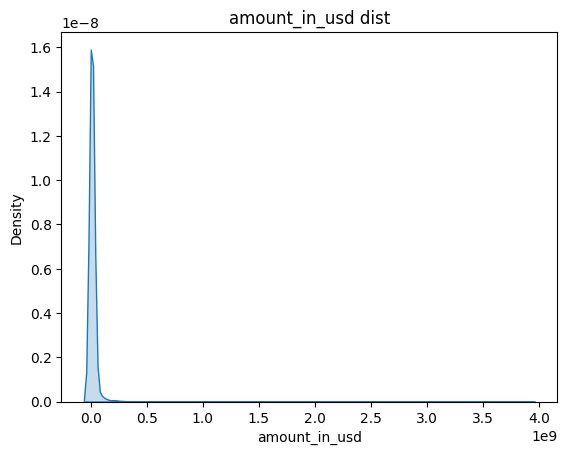

In [ ]:
print('skewness=',df['amount_in_usd'].skew()) #not normal, but right skewed
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(df['amount_in_usd'], fill=True)
plt.title('amount_in_usd dist')
plt.xlabel('amount_in_usd')
plt.show()

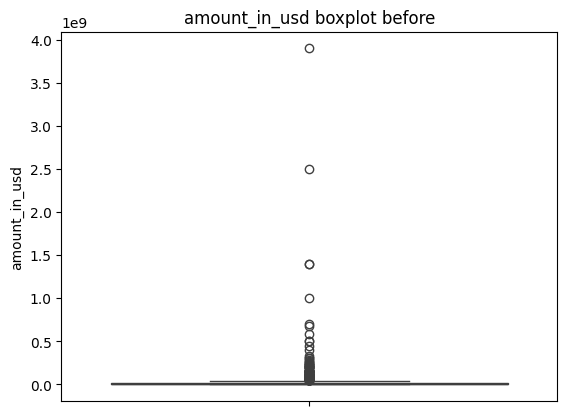

In [ ]:
sns.boxplot(df['amount_in_usd'])
plt.title('amount_in_usd boxplot before')
plt.show()

In [ ]:
q1 = df['amount_in_usd'].quantile(0.25)
q3 = df['amount_in_usd'].quantile(0.75)
iqr = q3 - q1
low_lim = q1 - 1.5*iqr
up_lim = q3 + 1.5*iqr
print('low_lim=',low_lim)
print('up_lim=', up_lim)

low_lim= -25144845.90621308
up_lim= 44574743.1770218


In [ ]:
df['amount_in_usd'].describe() #values extreme but not invalid. hence keeping as huge extremes may represent big investments.

,amount_in_usd
count,3.016000e+03
mean,1.829467e+07
std,9.979837e+07
min,1.600000e+04
25%,1.000000e+06
50%,7.500000e+06
75%,1.842990e+07
max,3.900000e+09


#Handling inconsistencies and inaccuracies

In [ ]:
cat_cols = ['startup_name', 'industry_vertical', 'subvertical', 'city_location', 'investment_type']
for col in cat_cols:
  df[col] = df[col].str.strip().str.replace('-',' ').str.replace('&','and').str.lower()

In [ ]:
df['city_location'].sort_values().unique()
map = {
    'ahemdabad' : 'ahmedabad',
    'ahemadabad': 'ahmedabad',
    'bengaluru': 'bangalore',
    'koramangala':'bangalore',
    'bhubneswar': 'bhubaneswar',
    'delhi': 'NCR',
    'new delhi': 'NCR',
    'nw delhi': 'NCR',
    'faridabad': 'NCR',
    'noida': 'NCR',
    'gurgaon': 'NCR',
    'gurugram':'NCR',
    'kolkatta':'kolkata',
}
df['city_location'].replace(map, inplace=True)

/tmp/ipython-input-3613108717.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['city_location'].replace(map, inplace=True)


In [ ]:
df['industry_vertical'].unique()
df['industry_vertical'] = df['industry_vertical'].str.strip()
map = {
    'E Commerce': 'Ecommerce',
    'ECommerce':'Ecommerce',
    'e commerce': 'Ecommerce',
    'ecommerce':'Ecommerce',
    'e Commerce':'Ecommerce',
    'eCommerce':'Ecommerce'
}
df['industry_vertical'].replace(map,inplace=True)

/tmp/ipython-input-2439757155.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['industry_vertical'].replace(map,inplace=True)


In [ ]:
df['subvertical']=df['subvertical'].str.replace('platform','')

df['subvertical'] = df['subvertical'].str.replace('online','')

In [ ]:
df['subvertical'] = df['subvertical'].str.strip()

In [ ]:
df['investment_type'].unique()
map = {
    'private equity round':'private equity',
    'seed/ angel funding' : 'seed angel funding',
    'seed / angel funding': 'seed angel funding',
    'seed/angel funding' : 'seed angel funding',
    'seed / angle funding':'seed angel funding',
    'angel / seed funding': 'seed angel funding',
    'privateequity': 'private equity',
    'private\\\\nequity': 'private equity',
    'seed\\\\nfunding':'seed funding'
}
df['investment_type']=df['investment_type'].replace(map)
df['investment_type'].unique()

array(['private equity', 'series c', 'series b', 'pre series a',
       'seed round', 'series a', 'series d', 'seed', 'series f',
       'series e', 'series g', 'series h', 'venture', 'debt funding',
       'seed funding', 'funding round', 'corporate round', 'maiden round',
       'single venture', 'venture round', 'angel', 'series j',
       'angel round', 'venture   series unknown', 'bridge round',
       'debt and preference capital', 'inhouse funding',
       'seed angel funding', 'debt', 'equity', 'mezzanine',
       'series b (extension)', 'equity based funding', 'private funding',
       'private', 'structured debt', 'term loan', 'angel funding',
       'crowd funding'], dtype=object)

In [ ]:
df.rename(columns={'amount_in_usd':'amount_in_cr'},inplace=True)

In [ ]:
df['amount_in_cr'] = df['amount_in_cr']*(85.0)/10000000.0
df['amount_in_cr'] = df['amount_in_cr'].round(2)
df.head()

,date,startup_name,industry_vertical,subvertical,city_location,investors_name,investment_type,amount_in_cr
0,2020-09-01,byju’s,e tech,e learning,bangalore,Tiger Global Management,private equity,1700.00
1,NaT,shuttl,transportation,app based shuttle service,NCR,Susquehanna Growth Equity,series c,68.41
2,2020-09-01,mamaearth,Ecommerce,retailer of baby and toddler products,bangalore,Sequoia Capital India,series b,156.05
3,2020-02-01,https://www.wealthbucket.in/,fintech,investment,NCR,Vinod Khatumal,pre series a,25.50
4,2020-02-01,fashor,fashion and apparel,embroiled clothes for women,mumbai,Sprout Venture Partners,seed round,15.30


In [ ]:
df['amount_in_cr'].describe() #no inaccuracies or invalid data found.

,amount_in_cr
count,3016.000000
mean,155.503236
std,848.286131
min,0.140000
25%,8.500000
50%,63.750000
75%,156.650000
max,33150.000000


#EDA

Univariate analysis of categorical columns

In [ ]:
df.columns

Index(['date', 'startup_name', 'industry_vertical', 'subvertical',
       'city_location', 'investors_name', 'investment_type', 'amount_in_cr'],
      dtype='object')


Number of missing values in startup_name:
0

Number of unique categories in startup_name:
2328

Frequency Distribution of top 10 in startup_name (including 'Other'):
startup_name
Other          0.978448
swiggy         0.002653
ola cabs       0.002653
paytm          0.002321
meesho         0.001989
healthifyme    0.001989
nobroker       0.001989
nykaa          0.001989
lenskart       0.001989
holachef       0.001989
urbanclap      0.001989
Name: proportion, dtype: float64


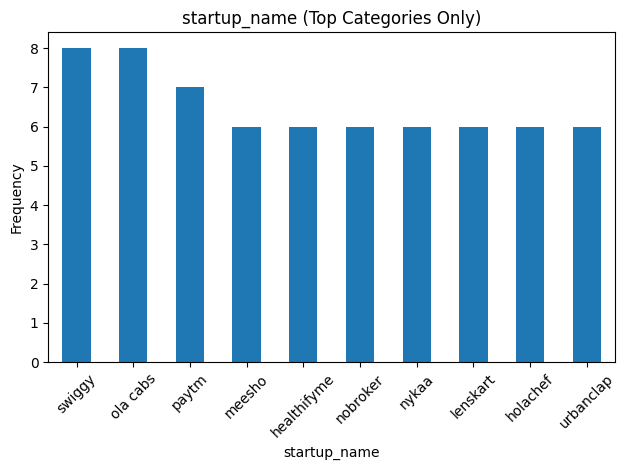


Number of missing values in industry_vertical:
0

Number of unique categories in industry_vertical:
785

Frequency Distribution of top 10 in industry_vertical (including 'Other'):
industry_vertical
consumer internet    0.366711
Other                0.299072
technology           0.157825
Ecommerce            0.098475
healthcare           0.023210
finance              0.019231
logistics            0.010610
food and beverage    0.009284
education            0.007626
ed tech              0.004642
fintech              0.003316
Name: proportion, dtype: float64


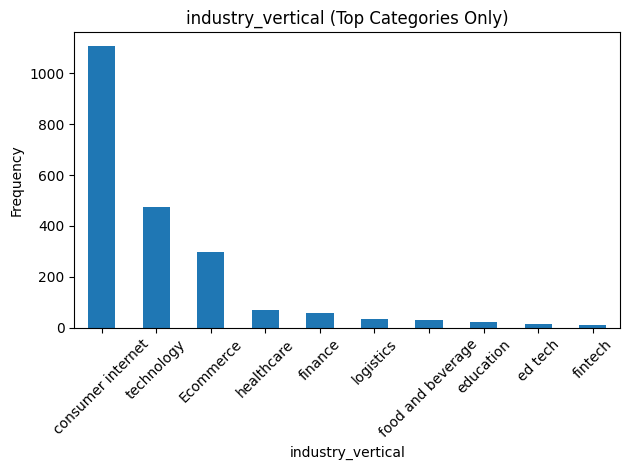


Number of missing values in subvertical:
930

Number of unique categories in subvertical:
1815

Frequency Distribution of top 10 in subvertical (including 'Other'):
subvertical
Other                   0.658488
missing                 0.308355
lending                 0.008952
food delivery           0.006300
education               0.003316
pharmacy                0.003316
learning                0.002984
peer to peer lending    0.002321
payment gateway         0.001989
micro lending           0.001989
consumer lending        0.001989
Name: proportion, dtype: float64


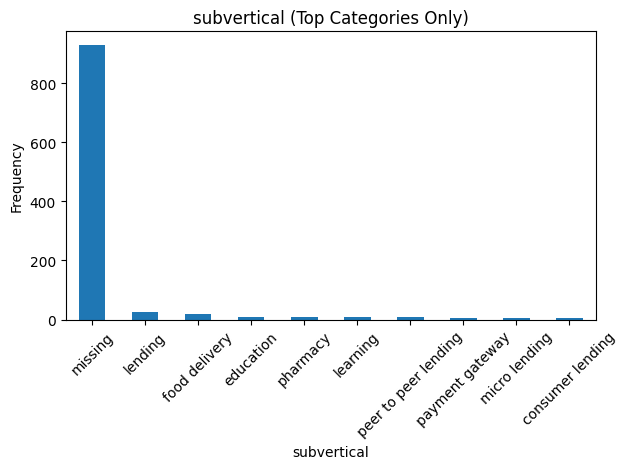


Number of missing values in city_location:
0

Number of unique categories in city_location:
98

Frequency Distribution of top 10 in city_location (including 'Other'):
city_location
bangalore    0.336538
NCR          0.292440
mumbai       0.184350
Other        0.052387
pune         0.034814
hyderabad    0.032493
chennai      0.032162
ahmedabad    0.013263
jaipur       0.009947
kolkata      0.007294
indore       0.004310
Name: proportion, dtype: float64


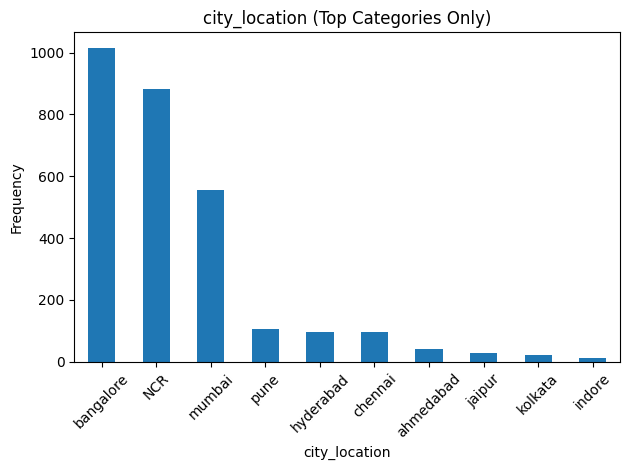


Number of missing values in investment_type:
0

Number of unique categories in investment_type:
39

Frequency Distribution of top 10 in investment_type (including 'Other'):
investment_type
seed funding          0.457228
private equity        0.450597
seed angel funding    0.043103
Other                 0.012599
series a              0.007958
debt funding          0.007958
series b              0.006631
series c              0.004642
series d              0.003979
pre series a          0.002984
seed round            0.002321
Name: proportion, dtype: float64


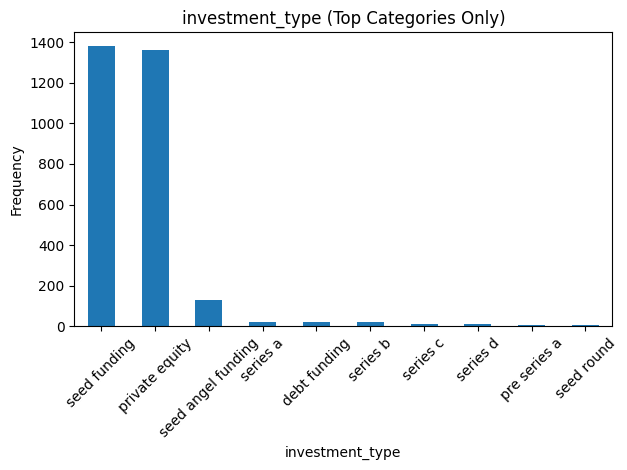

In [ ]:
cat_cols = ['startup_name', 'industry_vertical', 'subvertical', 'city_location', 'investment_type']

for col in cat_cols:
    print(f"\nNumber of missing values in {col}:")
    print(df[df[col]=='missing'][col].count())
    print(f"\nNumber of unique categories in {col}:")
    num_unique = df[col].nunique()
    print(num_unique)

    if num_unique > 10:
        print(f"\nFrequency Distribution of top 10 in {col} (including 'Other'):")

        top10 = df[col].value_counts(normalize=True).nlargest(10)

        temp_col = df[col].apply(lambda x: x if x in top10 else 'Other')

        freq = temp_col.value_counts(normalize=True)
        print(freq)

        plot_data = temp_col[temp_col != 'Other'].value_counts()
        plot_data.plot(kind='bar', title=f"{col} (Top Categories Only)")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    else:
        print(f"\nFrequency Distribution of {col}:")
        print(df[col].value_counts(normalize=True))
        df[col].value_counts().plot(kind='pie', autopct='%0.1f%%', title=col)
        plt.ylabel("")
        plt.tight_layout()
        plt.show()


In [ ]:
df_cpy = df
df_cpy['investors_name'] = df_cpy['investors_name'].str.split(',')

In [ ]:
df_cpy = df_cpy.explode('investors_name')
df_cpy['investors_name'] = df_cpy['investors_name'].str.strip().str.lower().str.replace('&','and',regex=False).str.replace('-','',regex=False)
df_cpy= df_cpy[df_cpy['investors_name'].str.strip() !='']
df_cpy = df_cpy.dropna(subset=['investors_name'])


Number of missing values in investors_name:
0

Number of unique categories in investors_name:
3220

Frequency Distribution of top 10 in investors_name (including 'Other'):
investors_name
Other                     0.912011
undisclosed investors     0.014316
sequoia capital           0.012570
accel partners            0.011872
kalaari capital           0.008729
saif partners             0.008554
blume ventures            0.008554
indian angel network      0.007507
nexus venture partners    0.005412
ratan tata                0.005412
idg ventures              0.005063
Name: proportion, dtype: float64


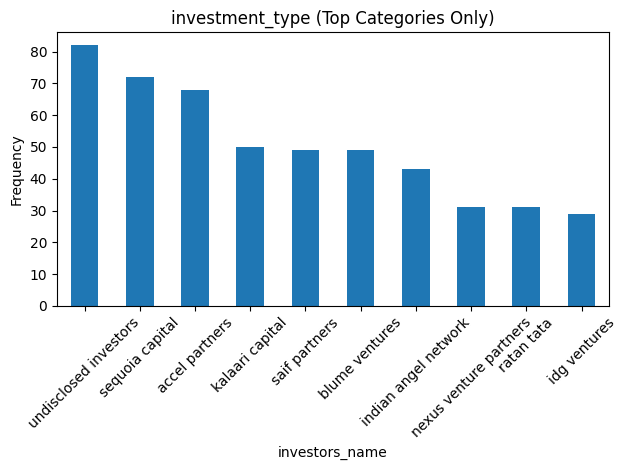

In [ ]:
print(f"\nNumber of missing values in investors_name:")
print(df_cpy[df_cpy['investors_name']=='missing']['investors_name'].count())
print(f"\nNumber of unique categories in {'investors_name'}:")
num_unique = df_cpy['investors_name'].nunique()
print(num_unique)

if num_unique > 10:
  print(f"\nFrequency Distribution of top 10 in investors_name (including 'Other'):")
  top10 = df_cpy['investors_name'].value_counts(normalize=True).nlargest(10)
  temp_col = df_cpy['investors_name'].apply(lambda x: x if x in top10 else 'Other')
  freq = temp_col.value_counts(normalize=True)
  print(freq)
  plot_data = temp_col[temp_col != 'Other'].value_counts()
  plot_data.plot(kind='bar', title=f"{col} (Top Categories Only)")
  plt.ylabel("Frequency")
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

else:
  print(f"\nFrequency Distribution of investors_name:")
  print(df_cpy['investors_name'].value_counts(normalize=True))
  df_cpy['investors_name'].value_counts().plot(kind='pie', autopct='%0.1f%%', title=col)
  plt.ylabel("")
  plt.tight_layout()
  plt.show()


Univariate analysis of numerical columns:-


missing values of amount_in_cr:
0

statistics of amount_in_cr:
count     3016.000000
mean       155.503236
std        848.286131
min          0.140000
25%          8.500000
50%         63.750000
75%        156.650000
max      33150.000000
Name: amount_in_cr, dtype: float64

skewness of amount_in_cr:
27.18758216391258


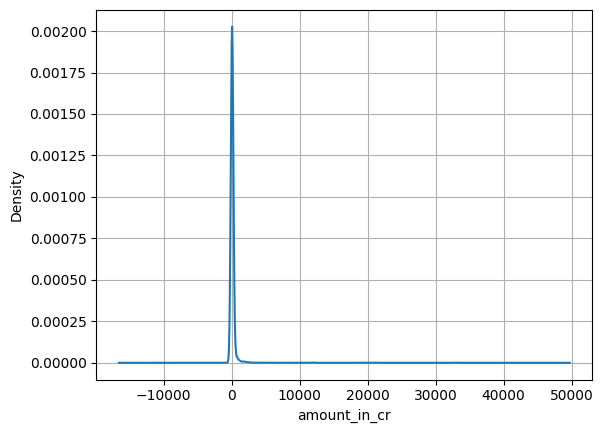

upper bound= 378.875
lower bound= -213.72500000000002

% of outliers= 4.840848806366048


In [ ]:
num_cols = ['amount_in_cr']

for col in num_cols:
  print(f'\nmissing values of {col}:')
  print(df[col].isnull().sum())
  print(f"\nstatistics of {col}:")
  print(df[col].describe())
  print(f"\nskewness of {col}:")
  print(df[col].skew())
  df[col].plot(kind='kde')
  plt.xlabel(col)
  plt.grid(True)
  plt.show()

  if df[col].skew()>-1 and df[col].skew()<1:
    uplim = df[col].mean() + 3*df[col].std()
    lowlim = df[col].mean() - 3*df[col].std()
    print('upper bound=',uplim)
    print('lower bound=',lowlim)
    print(f'\n% of outliers=', df[(df[col]>uplim) | (df[col]<lowlim)]['amount_in_cr'].count()*100/df['amount_in_cr'].count())
  else:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    uplim = q3 + 1.5*iqr
    lowlim = q1 - 1.5*iqr
    print('upper bound=',uplim)
    print('lower bound=',lowlim)
    print(f'\n% of outliers=', df[(df[col]>uplim) | (df[col]<lowlim)]['amount_in_cr'].count()*100/df['amount_in_cr'].count())

Univariate EDA on datetime columns:-

Earliest date: 2015-01-05 00:00:00
Latest date: 2020-10-01 00:00:00
Total days span: 2096
Missing dates count: 1739


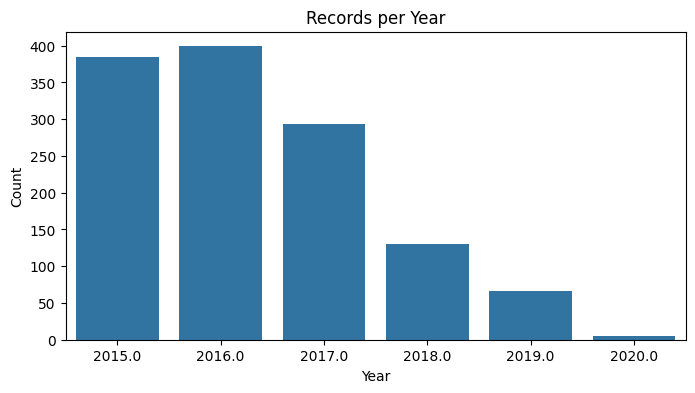

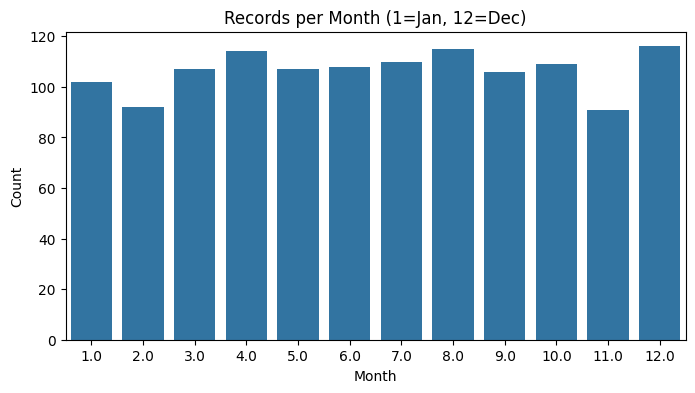

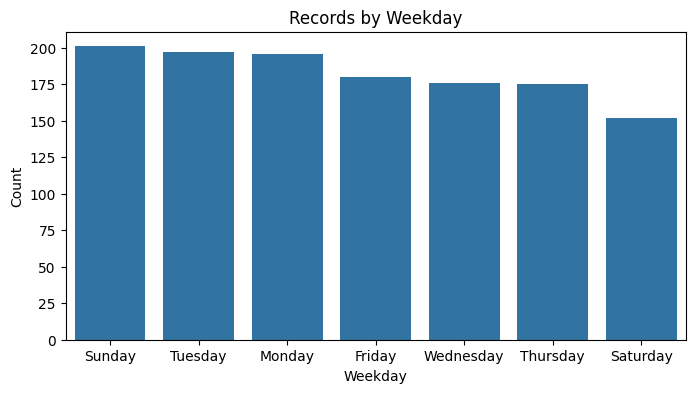

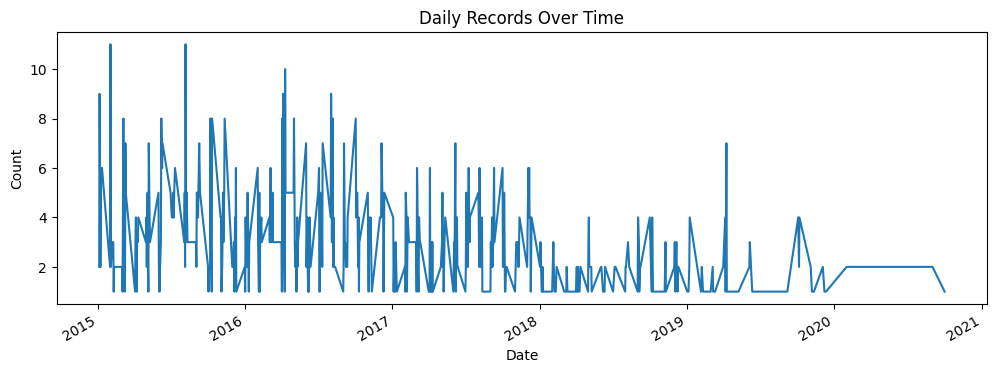

In [ ]:
print("Earliest date:", df['date'].min())
print("Latest date:", df['date'].max())
print("Total days span:", (df['date'].max() - df['date'].min()).days)

print("Missing dates count:", df['date'].isna().sum())

year_counts = df['date'].dt.year.value_counts().sort_index()
plt.figure(figsize=(8,4))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title("Records per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

month_counts = df['date'].dt.month.value_counts().sort_index()
plt.figure(figsize=(8,4))
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title("Records per Month (1=Jan, 12=Dec)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

weekday_counts = df['date'].dt.day_name().value_counts()
plt.figure(figsize=(8,4))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.title("Records by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.show()

daily_counts = df['date'].value_counts().sort_index()
plt.figure(figsize=(12,4))
daily_counts.plot()
plt.title("Daily Records Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

In [ ]:
df.columns

Index(['date', 'startup_name', 'industry_vertical', 'subvertical',
       'city_location', 'investors_name', 'investment_type', 'amount_in_cr'],
      dtype='object')

Bivariate analysis with categorical columns:-
- Target column = amount_in_cr


Statistical Summary for startup_name vs amount_in_cr 
              count     mean  median    min       max      std
startup_name                                                  
paytm             7  3868.48  510.00  76.08  11900.00  4878.99
ola cabs          8   731.14  280.50   8.50   2210.00   872.36
nykaa             6   329.28  130.60  80.75   1336.20   495.43
meesho            6   320.82  156.65  26.35   1062.50   387.64
swiggy            8   287.41  133.88  17.00    850.00   309.05
lenskart          6   171.33  156.65  18.27    510.00   178.22
nobroker          6   153.37  120.82  25.50    433.50   146.77
urbanclap         6   112.10  120.82  13.60    212.50    82.78
healthifyme       6    87.63   76.50   8.50    156.65    61.12
holachef          6    38.42   21.04   2.65    156.65    58.85


/tmp/ipython-input-4283150232.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=plot_df, palette='Set2')


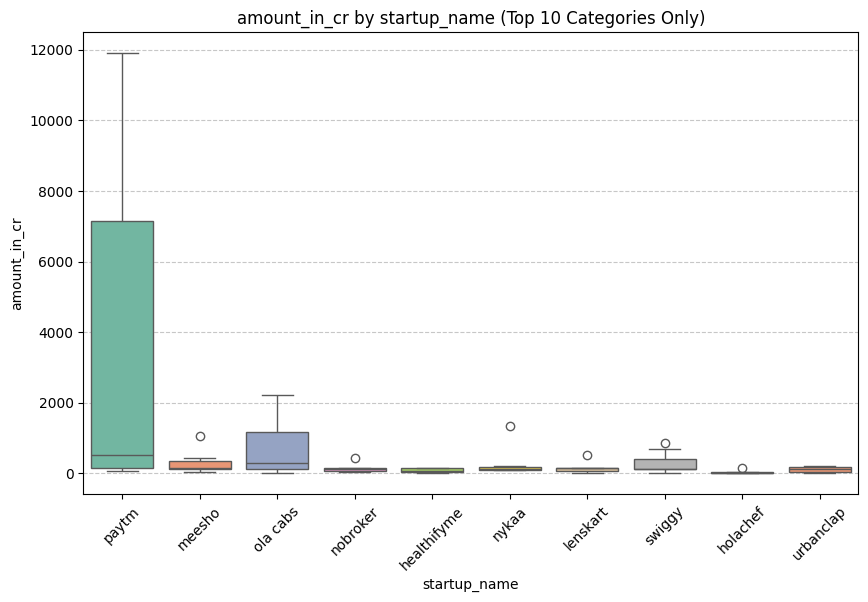


Statistical Summary for industry_vertical vs amount_in_cr 
                   count     mean  median    min       max      std
industry_vertical                                                  
fintech               10  1040.58  129.62  25.50   8500.00  2636.30
Ecommerce            297   285.90   85.00   0.26  21250.00  1577.40
finance               58   213.46   85.00   1.27   2295.00   401.22
consumer internet   1106   112.74   59.50   0.14   2805.00   215.80
healthcare            70   108.85  145.48   1.27    850.00   120.68
logistics             32   108.56   89.25   0.64    595.00   115.18
technology           476    94.77   57.38   0.19    977.50   115.13
education             23    71.43   34.00   0.38    425.00    97.71
food and beverage     28    64.51   49.30   1.18    156.65    64.10
ed tech               14    43.93   17.00   0.85    156.65    58.44


/tmp/ipython-input-4283150232.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=plot_df, palette='Set2')


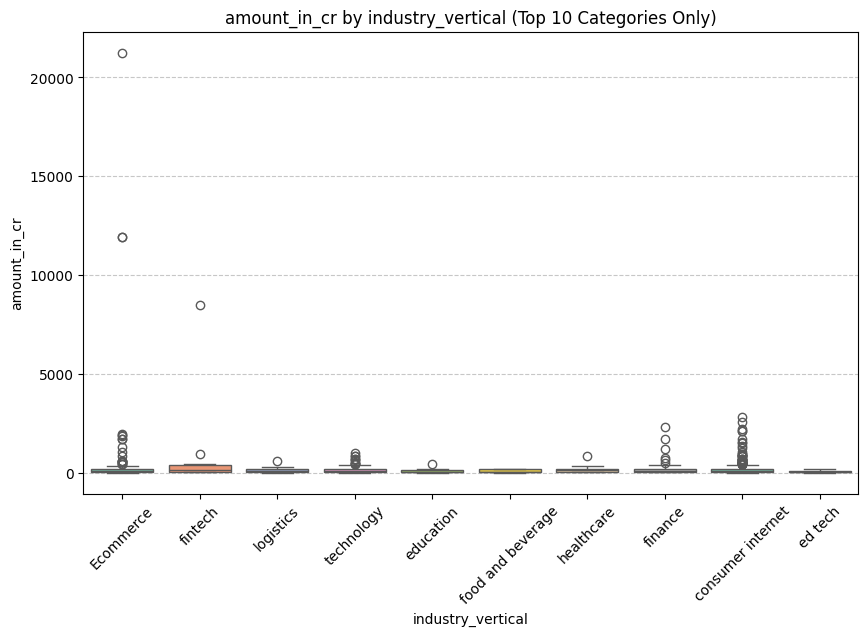


Statistical Summary for subvertical vs amount_in_cr 
                      count    mean  median    min      max     std
subvertical                                                        
food delivery            19  213.09  156.65   2.65  1275.00  343.57
education                10  152.70   12.75   0.85  1275.00  397.05
pharmacy                 10  135.28  154.82  42.50   156.65   35.89
lending                  27  128.88   85.00   3.82   739.50  155.88
missing                 930  127.08   51.00   0.14  5950.00  377.46
payment gateway           6  108.23  116.15  25.50   190.40   73.15
peer to peer lending      7   93.16  156.65   4.25   156.65   79.23
consumer lending          6   74.27   55.25   8.50   156.65   65.29
learning                  9   67.08   38.25   5.52   156.65   67.12
micro lending             6   55.01   39.95   4.25   156.65   55.44


/tmp/ipython-input-4283150232.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=plot_df, palette='Set2')


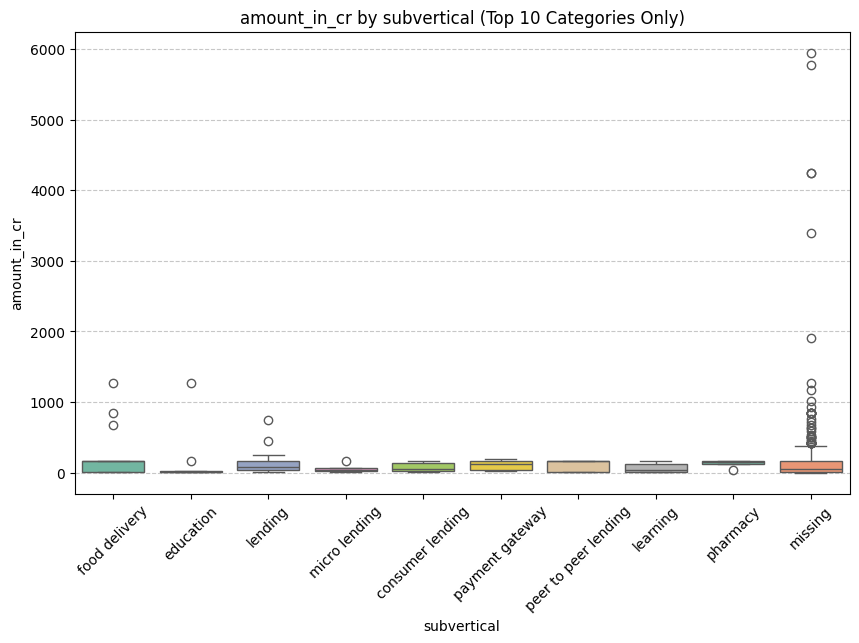


Statistical Summary for city_location vs amount_in_cr 
               count    mean  median   min       max      std
city_location                                                
bangalore       1015  211.95   63.75  0.14  33150.00  1383.82
NCR              882  140.91   85.00  0.19   8500.00   428.07
jaipur            30  126.82  156.65  0.85    935.00   167.40
mumbai           556  112.07   51.00  0.19   2295.00   199.50
pune             105  101.97   47.60  0.69    850.00   136.63
indore            13   99.45  156.65  2.52    156.65    75.38
chennai           97   98.51   51.00  0.64    850.00   132.48
kolkata           22   91.62  156.65  0.42    156.65    74.11
hyderabad         98   76.35   25.50  0.60    626.45   102.67
ahmedabad         40   72.47   46.46  0.62    272.00    73.86


/tmp/ipython-input-4283150232.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=plot_df, palette='Set2')


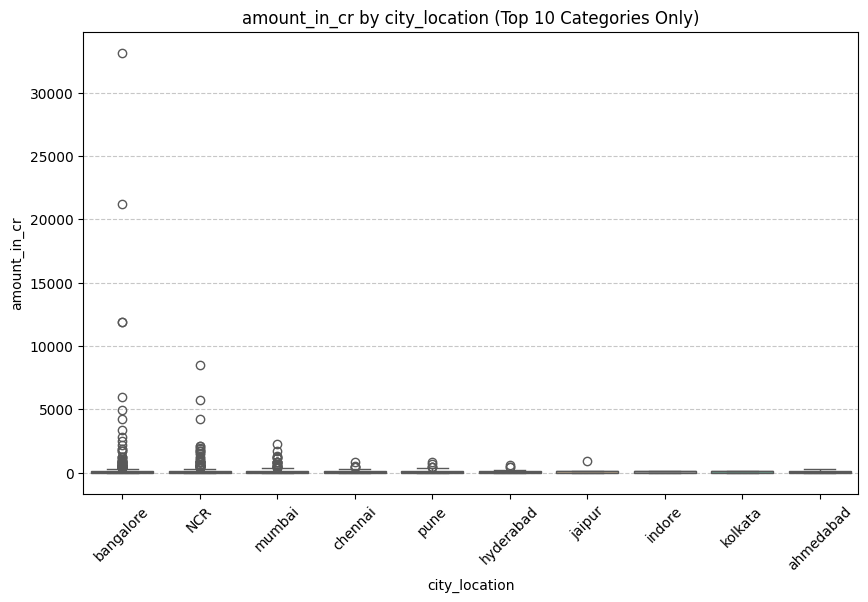


Statistical Summary for investment_type vs amount_in_cr 
                    count     mean  median    min      max      std
investment_type                                                    
series b               20  2039.66  135.15   4.13  33150.0  7358.80
series d               12  1049.61  552.50  93.50   4972.5  1343.85
series c               14   634.29  425.00  56.02   3825.0   971.77
seed round              7   237.76   15.30   4.25   1190.0   447.52
private equity       1359   199.56   85.00   0.85  21250.0   823.70
series a               24    85.02   42.50   4.25    382.5    94.36
seed funding         1379    76.82   10.20   0.14   1870.0    90.22
pre series a            9    59.31   25.50   4.86    221.0    76.08
debt funding           24    58.70   40.38   6.63    221.0    55.64
seed angel funding    130    50.33    8.50   0.33    850.0    94.90


/tmp/ipython-input-4283150232.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=plot_df, palette='Set2')


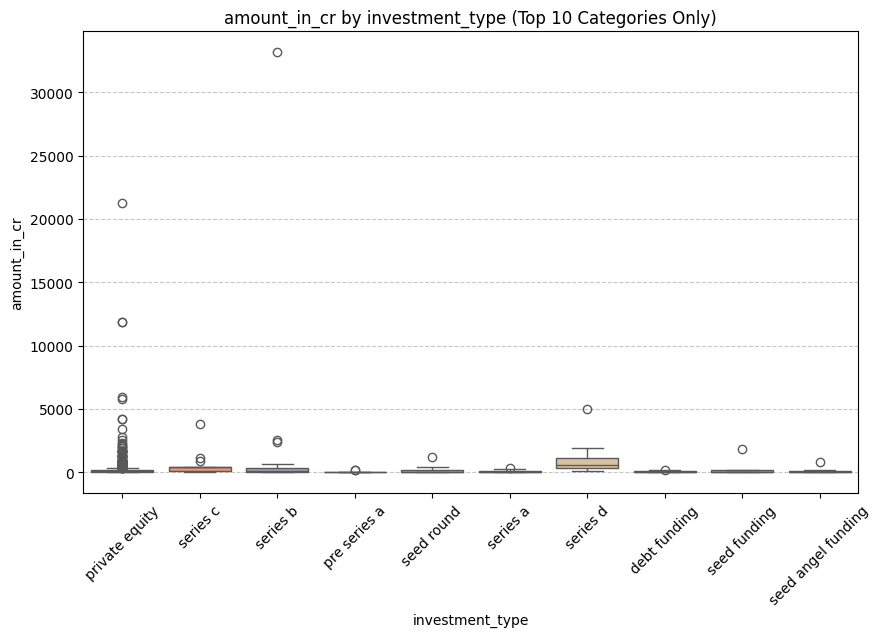

In [ ]:
target = 'amount_in_cr'
cat_cols = ['startup_name', 'industry_vertical', 'subvertical', 'city_location', 'investment_type']

for col in cat_cols:
    if df[col].nunique() > 10:
        top10_categories = df[col].value_counts().nlargest(10).index.tolist()
        plot_df = df[df[col].isin(top10_categories)].copy()
        summary = (
        plot_df.groupby(col)[target]
        .agg(['count', 'mean', 'median', 'min', 'max', 'std'])
        .sort_values(by=['mean','count'], ascending=[False,False])
        .round(2)
        )
        print(f"\nStatistical Summary for {col} vs {target} ")
        print(summary)
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=col, y=target, data=plot_df, palette='Set2')
        plt.title(f'{target} by {col} (Top 10 Categories Only)')
    else:
        plot_df = df.copy()
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=col, y=target, data=plot_df, palette='Set2')
        plt.title(f'{target} by {col}')

    plt.xlabel(col)
    plt.ylabel(target)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.show()

Bivariate analysis with datetime columns


Yearly Statistical Summary:
        count        mean   median    min      max          std
date                                                           
2015.0    384  127.886927   79.475   0.14   4250.0   310.602445
2016.0    399   96.152732   59.500   0.19   1530.0   134.320545
2017.0    293  188.815495   65.450   0.26  21250.0  1258.927950
2018.0    130  175.367615   76.075   0.68   2550.0   354.542918
2019.0     66  373.505152  106.715   1.23   4972.5   815.834820
2020.0      5  634.370000  156.050  15.30   1700.0   795.099751


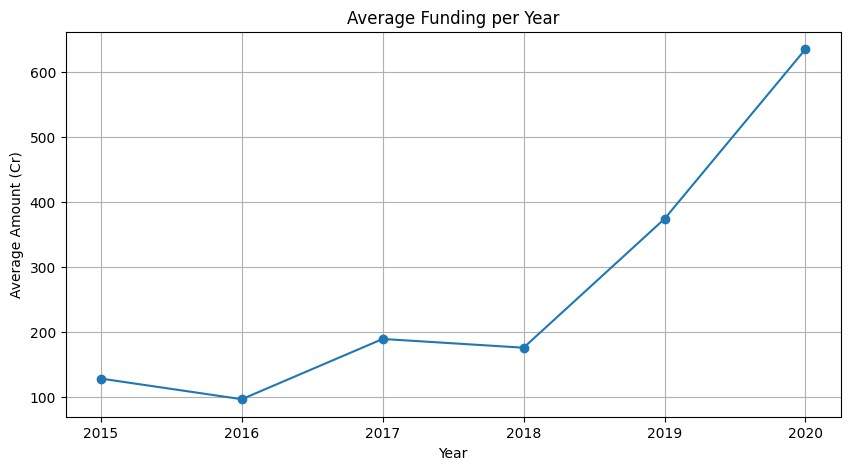


Monthly Statistical Summary:
      count        mean   median   min      max          std
date                                                        
1.0     102  238.983137  156.650  0.85   4250.0   590.698849
2.0      92  135.889348   17.635  0.14   4972.5   521.717244
3.0     107  162.000093  141.100  0.26   1912.5   291.719104
4.0     114  135.826228   49.300  0.26   3825.0   379.995206
5.0     107  108.127009   85.000  0.38   1336.2   157.715627
6.0     108  119.102778   66.300  0.23    850.0   166.929218
7.0     110  141.094182   72.250  0.26   2125.0   289.123268
8.0     115  146.868870   64.600  0.17   3400.0   377.395012
9.0     106  100.167736   51.000  0.42   1700.0   179.147694
10.0    109  108.824954   53.730  0.68   1275.0   183.464366
11.0     91  353.882308  110.500  0.42  21250.0  2220.348322
12.0    116  105.130862   85.000  0.68   1062.5   151.058847


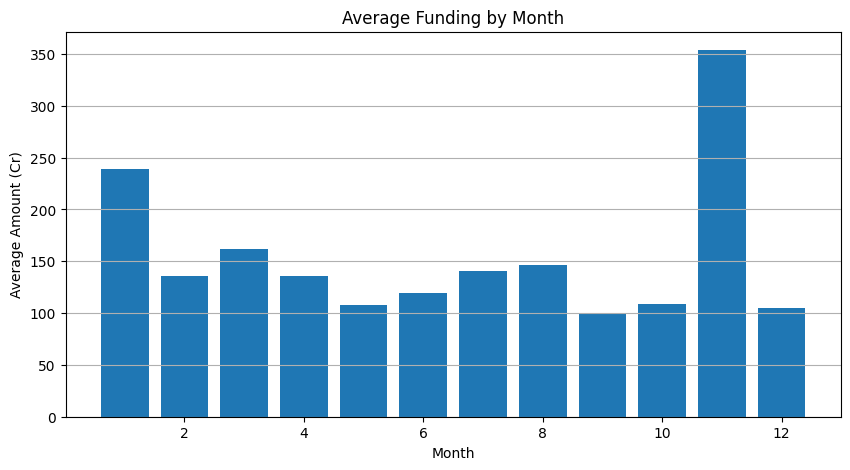

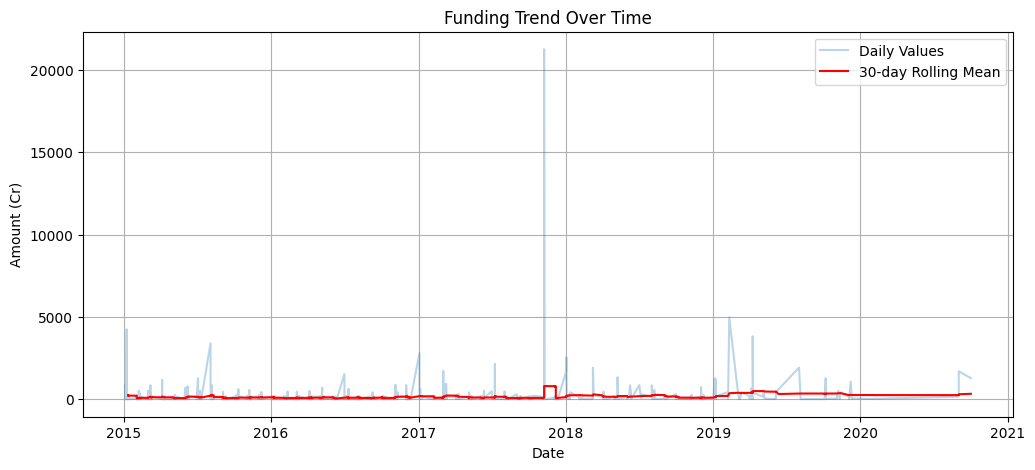


Outlier Funding Dates:
date
2018-08-02    2
2018-01-02    2
2015-04-06    2
2019-06-12    1
2020-09-01    1
2020-10-01    1
2019-04-10    1
2019-11-12    1
2019-03-12    1
2019-02-10    1
Name: count, dtype: int64


In [ ]:
yearly_stats = df.groupby(df['date'].dt.year)['amount_in_cr'].agg(['count', 'mean', 'median', 'min', 'max', 'std'])
print("\nYearly Statistical Summary:")
print(yearly_stats)

plt.figure(figsize=(10, 5))
plt.plot(yearly_stats.index, yearly_stats['mean'], marker='o')
plt.title("Average Funding per Year")
plt.xlabel("Year")
plt.ylabel("Average Amount (Cr)")
plt.grid(True)
plt.show()

monthly_stats = df.groupby(df['date'].dt.month)['amount_in_cr'].agg(['count', 'mean', 'median', 'min', 'max', 'std'])
print("\nMonthly Statistical Summary:")
print(monthly_stats)

plt.figure(figsize=(10, 5))
plt.bar(monthly_stats.index, monthly_stats['mean'])
plt.title("Average Funding by Month")
plt.xlabel("Month")
plt.ylabel("Average Amount (Cr)")
plt.grid(axis='y')
plt.show()

df_sorted = df.sort_values('date')
df_sorted['rolling_mean'] = df_sorted['amount_in_cr'].rolling(window=30).mean()

plt.figure(figsize=(12, 5))
plt.plot(df_sorted['date'], df_sorted['amount_in_cr'], alpha=0.3, label="Daily Values")
plt.plot(df_sorted['date'], df_sorted['rolling_mean'], color='red', label="30-day Rolling Mean")
plt.title("Funding Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Amount (Cr)")
plt.legend()
plt.grid(True)
plt.show()

q3 = df['amount_in_cr'].quantile(0.75)
iqr = q3 - df['amount_in_cr'].quantile(0.25)
threshold = q3 + 1.5 * iqr

outlier_dates = df[df['amount_in_cr'] > threshold]['date']
print("\nOutlier Funding Dates:")
print(outlier_dates.value_counts().head(10))

In [ ]:
df_forecast = df.dropna(subset=['date'])
df_forecast.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1277 entries, 0 to 3008
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               1277 non-null   datetime64[ns]
 1   startup_name       1277 non-null   object        
 2   industry_vertical  1277 non-null   object        
 3   subvertical        1277 non-null   object        
 4   city_location      1277 non-null   object        
 5   investors_name     1277 non-null   object        
 6   investment_type    1277 non-null   object        
 7   amount_in_cr       1277 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 89.8+ KB


In [ ]:
df_cluster = df.drop(columns=['date'])
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3016 entries, 0 to 3043
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   startup_name       3016 non-null   object 
 1   industry_vertical  3016 non-null   object 
 2   subvertical        3016 non-null   object 
 3   city_location      3016 non-null   object 
 4   investors_name     3016 non-null   object 
 5   investment_type    3016 non-null   object 
 6   amount_in_cr       3016 non-null   float64
dtypes: float64(1), object(6)
memory usage: 188.5+ KB


In [ ]:
df_forecast.to_csv('df_forecast.csv', index=False)

df_cluster.to_csv('df_cluster.csv', index=False)

In [ ]:
df.to_csv('cleaned_df.csv', index=False)

In [ ]:
df_cpy.to_csv('exploded_df.csv', index=False)